In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tushare as ts
import talib as ta
import pandas.util.testing as tm

In [3]:
tm.N=5
df = tm.makeTimeDataFrame()
np.asarray(df.columns).repeat(3)
np.tile(df.index,(3,1)).flatten()

array(['2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000',
       '2000-01-05T00:00:00.000000000', '2000-01-06T00:00:00.000000000',
       '2000-01-07T00:00:00.000000000', '2000-01-03T00:00:00.000000000',
       '2000-01-04T00:00:00.000000000', '2000-01-05T00:00:00.000000000',
       '2000-01-06T00:00:00.000000000', '2000-01-07T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000',
       '2000-01-05T00:00:00.000000000', '2000-01-06T00:00:00.000000000',
       '2000-01-07T00:00:00.000000000'], dtype='datetime64[ns]')

In [4]:
def unpivot(frame):
    N, K = frame.shape
    data = {'value': frame.to_numpy().ravel('F'),
            'variable': np.asarray(frame.columns).repeat(N),
            'date': np.tile(np.asarray(frame.index), K)}
    return pd.DataFrame(data, columns=['date', 'variable', 'value'])

ddf=tm.makeTimeDataFrame()
df = unpivot(ddf)
print ddf
# a=df.to_numpy()
# print a.ravel('C')
# print a.ravel('F')
# print a.ravel('A')
# print a.ravel('K')
df[df['variable']=='A']

                   A         B         C         D
2000-01-03  0.034729 -1.487590 -0.187606  0.565246
2000-01-04 -1.056123 -0.535992  0.140005  0.380632
2000-01-05  0.963281  0.824161 -0.583002 -1.725578
2000-01-06  0.043994  0.881352 -0.459551  0.486529
2000-01-07  0.901370 -0.917089 -0.442238 -2.021392


,date,variable,value
0,2000-01-03,A,0.034729
1,2000-01-04,A,-1.056123
2,2000-01-05,A,0.963281
3,2000-01-06,A,0.043994
4,2000-01-07,A,0.901370


In [5]:
df.pivot(index='date',columns='variable',values='value')

variable,A,B,C,D
date,,,,
2000-01-03,0.034729,-1.487590,-0.187606,0.565246
2000-01-04,-1.056123,-0.535992,0.140005,0.380632
2000-01-05,0.963281,0.824161,-0.583002,-1.725578
2000-01-06,0.043994,0.881352,-0.459551,0.486529
2000-01-07,0.901370,-0.917089,-0.442238,-2.021392


In [6]:
df['value2']=df['value']*2

In [8]:
pdf =df.pivot(index='date',columns='variable',values='value')

In [10]:
pdf.stack()

date        variable
2000-01-03  A           0.034729
            B          -1.487590
            C          -0.187606
            D           0.565246
2000-01-04  A          -1.056123
            B          -0.535992
            C           0.140005
            D           0.380632
2000-01-05  A           0.963281
            B           0.824161
            C          -0.583002
            D          -1.725578
2000-01-06  A           0.043994
            B           0.881352
            C          -0.459551
            D           0.486529
2000-01-07  A           0.901370
            B          -0.917089
            C          -0.442238
            D          -2.021392
dtype: float64

In [11]:
pdf.stack().unstack(0)

date,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00
variable,,,,,
A,0.034729,-1.056123,0.963281,0.043994,0.901370
B,-1.487590,-0.535992,0.824161,0.881352,-0.917089
C,-0.187606,0.140005,-0.583002,-0.459551,-0.442238
D,0.565246,0.380632,-1.725578,0.486529,-2.021392


In [12]:
columns = pd.MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                     ('B', 'cat'), ('A', 'dog')],
                                    names=['exp', 'animal'])


index = pd.MultiIndex.from_product([('bar', 'baz', 'foo', 'qux'),
                                    ('one', 'two')],
                                   names=['first', 'second'])


df = pd.DataFrame(np.random.randn(8, 4), index=index, columns=columns) 

In [13]:
df

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -0.744891 -0.614348  1.191877  0.220065
      two     0.936581  0.584121 -1.618866 -0.402702
baz   one    -0.713933 -1.039486 -0.139092 -0.740161
      two     1.887305  0.055852 -0.834851 -0.700329
foo   one    -0.572984  3.334652 -0.324520 -0.612477
      two    -0.342851 -0.168346  0.186395 -1.933779
qux   one    -0.464322 -0.235946 -0.900868  1.098310
      two    -0.002246 -0.255755  1.076940  0.265018

In [14]:
df2 = df.iloc[[0, 1, 2, 4, 5, 7]]
print df2

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -0.744891 -0.614348  1.191877  0.220065
      two     0.936581  0.584121 -1.618866 -0.402702
baz   one    -0.713933 -1.039486 -0.139092 -0.740161
foo   one    -0.572984  3.334652 -0.324520 -0.612477
      two    -0.342851 -0.168346  0.186395 -1.933779
qux   two    -0.002246 -0.255755  1.076940  0.265018


In [18]:
df2.stack(['exp','animal'])

first  second  exp  animal
bar    one     A    cat      -0.744891
                    dog       0.220065
               B    cat       1.191877
                    dog      -0.614348
       two     A    cat       0.936581
                    dog      -0.402702
               B    cat      -1.618866
                    dog       0.584121
baz    one     A    cat      -0.713933
                    dog      -0.740161
               B    cat      -0.139092
                    dog      -1.039486
foo    one     A    cat      -0.572984
                    dog      -0.612477
               B    cat      -0.324520
                    dog       3.334652
       two     A    cat      -0.342851
                    dog      -1.933779
               B    cat       0.186395
                    dog      -0.168346
qux    two     A    cat      -0.002246
                    dog       0.265018
               B    cat       1.076940
                    dog      -0.255755
dtype: float64

In [34]:
df2.unstack(0)
df.stack()

exp                         A         B
first second animal                    
bar   one    cat    -0.744891  1.191877
             dog     0.220065 -0.614348
      two    cat     0.936581 -1.618866
             dog    -0.402702  0.584121
baz   one    cat    -0.713933 -0.139092
             dog    -0.740161 -1.039486
      two    cat     1.887305 -0.834851
             dog    -0.700329  0.055852
foo   one    cat    -0.572984 -0.324520
             dog    -0.612477  3.334652
      two    cat    -0.342851  0.186395
             dog    -1.933779 -0.168346
qux   one    cat    -0.464322 -0.900868
             dog     1.098310 -0.235946
      two    cat    -0.002246  1.076940
             dog     0.265018 -0.255755

In [35]:
df.columns

MultiIndex(levels=[[u'A', u'B'], [u'cat', u'dog']],
           codes=[[0, 1, 1, 0], [0, 1, 0, 1]],
           names=[u'exp', u'animal'])

In [38]:
df.groupby(level=1,axis=1).mean()

animal             cat       dog
first second                    
bar   one     0.223493 -0.197141
      two    -0.341142  0.090710
baz   one    -0.426513 -0.889824
      two     0.526227 -0.322238
foo   one    -0.448752  1.361088
      two    -0.078228 -1.051063
qux   one    -0.682595  0.431182
      two     0.537347  0.004631

In [39]:
df = pd.read_csv("czk.mat.txt",delimiter="|")

In [44]:
# plt.scatter(df['pph'],df['sent'])
np.arange(15).reshape(3,5).data

<read-write buffer for 0x0000000010792530, size 60, offset 0 at 0x00000000106EEE30>

In [47]:
sdf=ts.get_k_data('600438')

In [55]:
sdf.columns
sdf.set_index('date')

,open,close,high,low,volume,code,sig
date,,,,,,,
2017-01-11,6.078,6.039,6.127,6.029,70877.0,600438,NaN
2017-01-12,6.049,6.039,6.088,6.010,57142.0,600438,NaN
2017-01-13,6.088,6.039,6.088,5.816,208629.0,600438,NaN
2017-01-16,6.010,6.127,6.166,5.835,322505.0,600438,NaN
2017-01-17,6.039,6.127,6.156,6.010,58487.0,600438,NaN
2017-01-18,6.146,6.029,6.146,6.010,55206.0,600438,NaN
2017-01-19,6.029,5.952,6.029,5.923,53740.0,600438,NaN
2017-01-20,5.961,6.020,6.039,5.913,103720.0,600438,NaN
2017-01-23,6.107,6.078,6.146,6.039,56145.0,600438,NaN


In [56]:
m,sig,hist = ta.MACD(sdf['close'])

In [57]:
sdf['sig']=sig

ValueError: invalid literal for float(): 2017-01-11

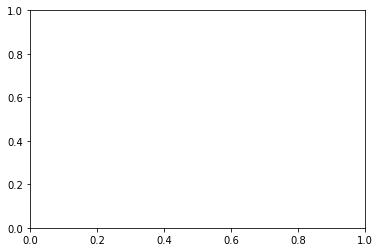

In [66]:
plt.plot(sdf[['date','sig']])
plt.show()